# Unveiling Retail Trends: A Dive into Sales Patterns and Customer Profiles

| Candidate Number                  |
| ------------------------------------ |
| CANDIDATE NUMBER: 2508234 |

## Project summary

 This project is aimed to explore a synthetic dataset of Retail Sales and Customer Demographics, unravelling intricate patterns, providing insights and to gain a deeper understanding of customer behaviour.

 Based on the analysis, categories like beauty, clothing and electronics dominate the sales figures, with varied demand across customer demographics. The purchase behaviour is significantly influenced by gender and age, with younger customers favouring popular categories like clothing. Electronics category consists most of the high-value transactions, while quantity-driven purchases boost categories like beauty.

## Generative AI

Generative AI has been utilised in the preparation of this report. However, no code has been directly plagiarised. The AI was made use solely to provide insights into achieving the project objectives, including suggestions for libraries and functions, guidance on their implementation and assistance with decoding error messages.

## Introduction

This report is an exploratory analysis of a ficional retail landscape, capturing essential attributes that drive retail operations and customer interactions. It includes key details such as Transaction ID, Date, Customer ID, Gender, Age, Product category, Quantity, Price per unit and total amount. 
The primary goal of this analysis  is to uncover retail sales trends, customer behaviours and key revenue drivers to provide insights for effective optimisation of sales strategies and improving customer engagement. The main objectives of this project are;

1. Analysing product performance by identifying top selling categories, trends and other factors driving product demand.
2. Explore customer demographics and their impact on purchase behaviours.
3. Determination of revenue contributions by examining transaction values, quantities and product categories.
4. Highlight areas for growth, such as underserved customer segments or underperforming categories.
5. Offering data-driven recommendations to enhance profitability and customer satisfaction.

## Setup

### Import necessary libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [13]:
file_path = "retail_sales_dataset.csv"
df = pd.read_csv(file_path)

### Convert into DataFrame

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
print(df.head())

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None


## Data management

### Data cleaning

##### Handling missing values:

In [21]:
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


 ##### Converting the necessary data types:

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

##### Removing duplicate entries:

In [25]:
df = df.drop_duplicates()
print("\nDataset after removing duplicates:")
print(df.info())


Dataset after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None


### Data wrangling

##### Creating columns:

In [28]:
bins = [0, 18, 35, 50, 65, 100]
labels = ['Under 18', '18-35', '36-50', '51-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

##### Combining two columns:

In [30]:
df['Category-Gender'] = df['Product Category'] + ' (' + df['Gender'] + ')'

##### Extracting data from 'Quantity' and 'Price per Unit' to create a new column named 'Computed Total Amount'.

In [32]:
df['Computed Total Amount'] = df['Quantity'] * df['Price per Unit']

In [33]:
discrepancies = df[df['Total Amount'] != df['Computed Total Amount']]

if not discrepancies.empty:
    print("\nDiscrepancies found between 'Total Amount' and 'Computed Total Amount':")
    print(discrepancies)

df['Total Amount'] = df['Quantity'] * df['Price per Unit']

df = df.drop(columns=['Computed Total Amount'])

##### Displaying the cleaned and wrangled dataset info and a preview

In [35]:
print("\nCleaned and Wrangled Dataset Info:")
print(df.info())
print("\nFirst 5 Rows of Cleaned and Wrangled Dataset:")
print(df.head())


Cleaned and Wrangled Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Age Group         1000 non-null   category      
 10  Category-Gender   1000 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(5), object(4)
memory usage: 79.4+ KB
None

First 5 Rows of Cleaned and Wrangled Dataset:
   Transaction ID    

## Data analysis

In [37]:
# Total sales by product category
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product Category:")
print(category_sales)

# Sales distribution by age group
age_group_sales = df.groupby('Age Group')['Total Amount'].sum()
print("\nSales Distribution by Age Group:")
print(age_group_sales)

# Gender-based sales comparison
gender_sales = df.groupby('Gender')['Total Amount'].sum()
print("\nGender-based Sales Comparison:")
print(gender_sales)

# Popular product categories by age group
popular_products_by_age = df.groupby(['Age Group', 'Product Category'])['Quantity'].sum().unstack()
print("\nPopular Product Categories by Age Group:")
print(popular_products_by_age)

# Time-based analysis: Total sales by month
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Amount'].sum()
print("\nTotal Sales by Month:")
print(monthly_sales)

# Customer analysis: Top 5 customers based on total spending
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers Based on Total Spending:")
print(top_customers)



Total Sales by Product Category:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

Sales Distribution by Age Group:
Age Group
Under 18         0
18-35       171740
36-50       141105
51-65       143155
65+              0
Name: Total Amount, dtype: int64

Gender-based Sales Comparison:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

Popular Product Categories by Age Group:
Product Category  Beauty  Clothing  Electronics
Age Group                                      
Under 18               0         0            0
18-35                313       295          280
36-50                242       301          256
51-65                216       298          313
65+                    0         0            0

Total Sales by Month:
Month
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    4

C:\Users\vigne\AppData\Local\Temp\ipykernel_43788\1757145506.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age Group')['Total Amount'].sum()
C:\Users\vigne\AppData\Local\Temp\ipykernel_43788\1757145506.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_products_by_age = df.groupby(['Age Group', 'Product Category'])['Quantity'].sum().unstack()


## Data visualisation

#### Visualization 1: Total sales by product category

C:\Users\vigne\AppData\Local\Temp\ipykernel_43788\1799065556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


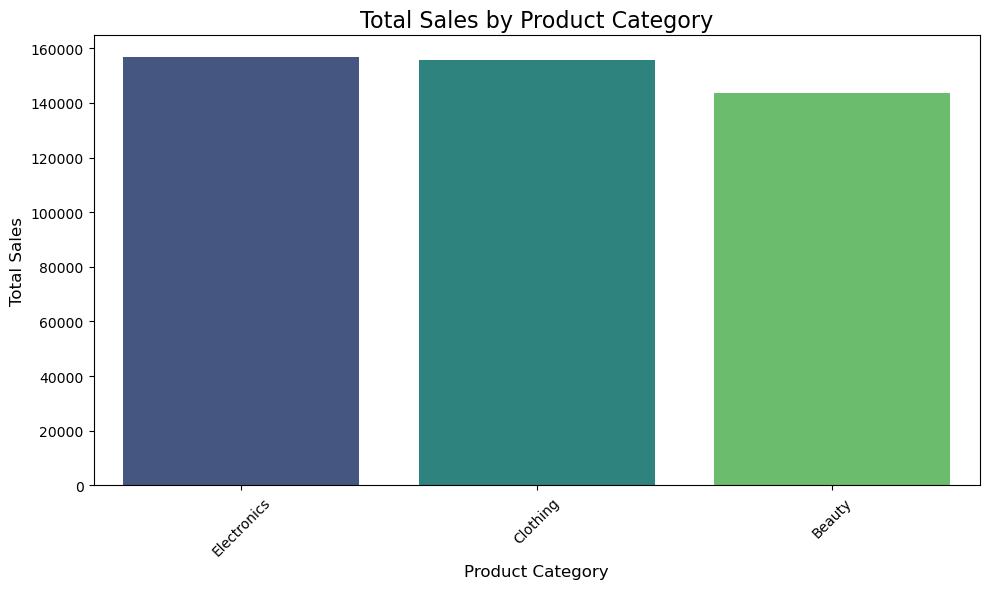

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_by_category.png')
plt.show()

The bar-chart represents the sales performance by product category. This visualisation identifies the most popular product lines and encourages further exploration of customer preferences.

#### Visualization 2: Sales distribution by age group

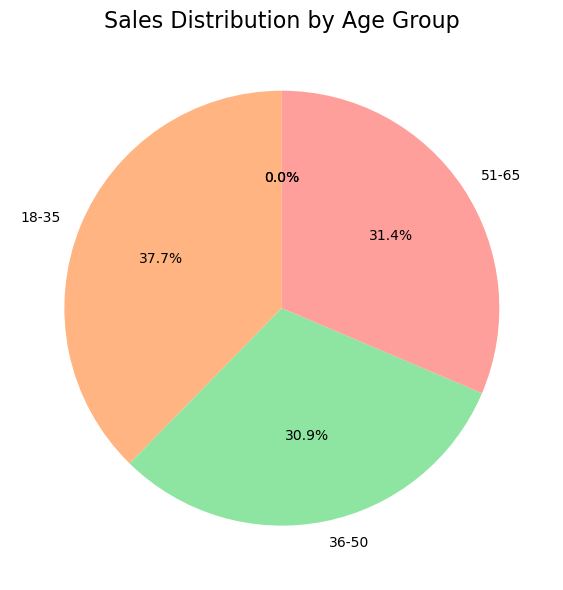

In [43]:
plt.figure(figsize=(8, 6))
age_group_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Age Group', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.savefig('sales_by_age_group.png') 
plt.show()

The pie chart depicts the distribution of sales across different age groups by highlighting how various age brackets contribute to the overall retail sales.

#### Visualization 3: Gender-based sales comparison

C:\Users\vigne\AppData\Local\Temp\ipykernel_43788\3740498924.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_sales.index, y=gender_sales.values, palette='coolwarm')


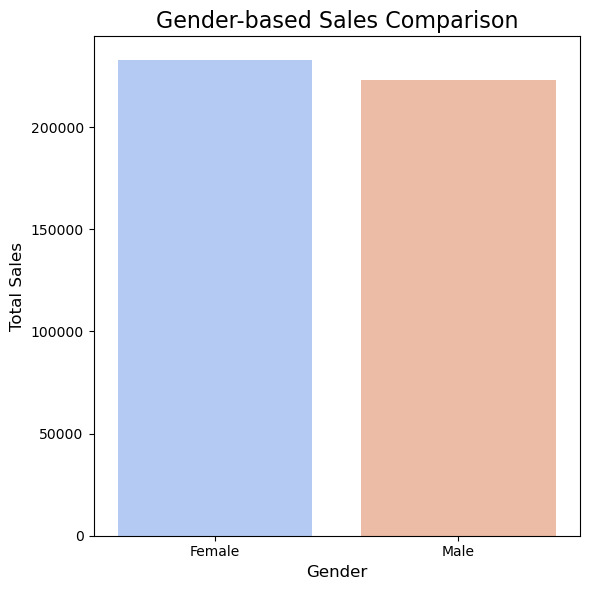

In [46]:
plt.figure(figsize=(6, 6))
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette='coolwarm')
plt.title('Gender-based Sales Comparison', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.savefig('sales_by_gender.png') 
plt.show()

The bar-chart compares the total sales between male and female customers. It can be seen that even if certain categories may show a higher affinity towards a particular gender, the overall sales is dominated by female customers.

#### Visualization 4: Popular product categories by age group

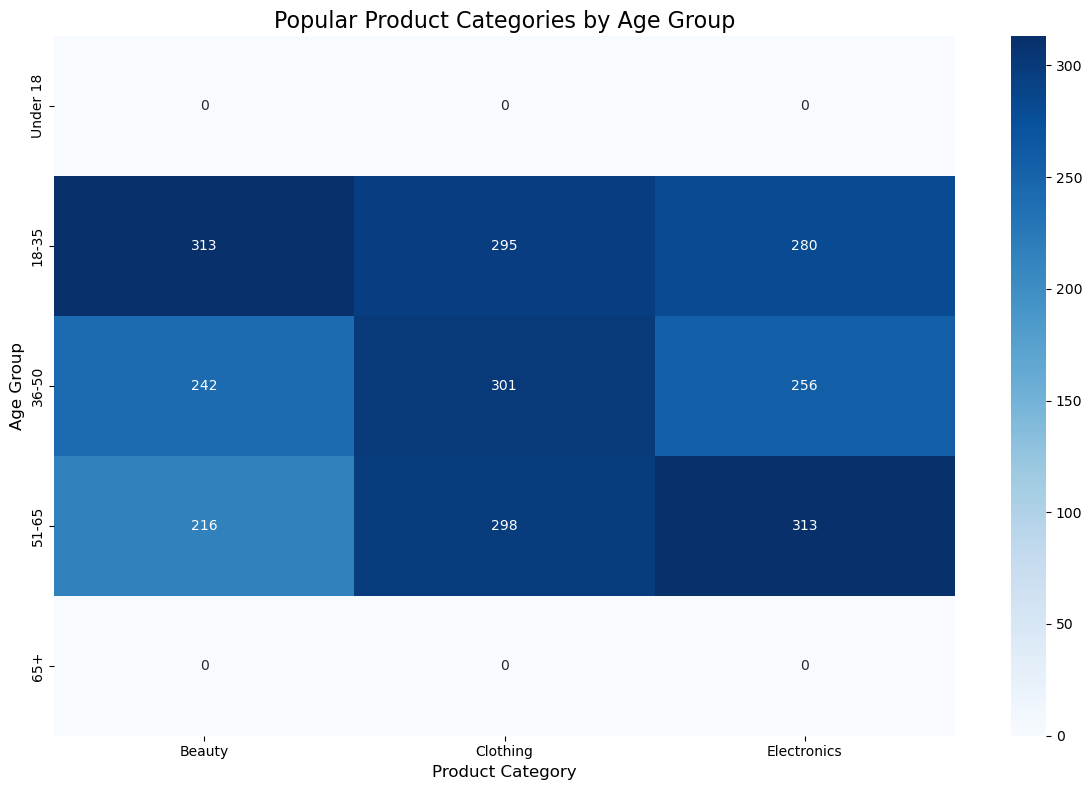

In [49]:
plt.figure(figsize=(12, 8))
sns.heatmap(popular_products_by_age, annot=True, fmt='d', cmap='Blues')
plt.title('Popular Product Categories by Age Group', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.tight_layout()
plt.savefig('Popular_Product_Categories_by_Age_Group.png')
plt.show()

The above heatmap depicts that while younger customers tend to favour categories like beauty, older customers often prioritize practical categories such as electronics.

#### Visualization 5: Total sales by month

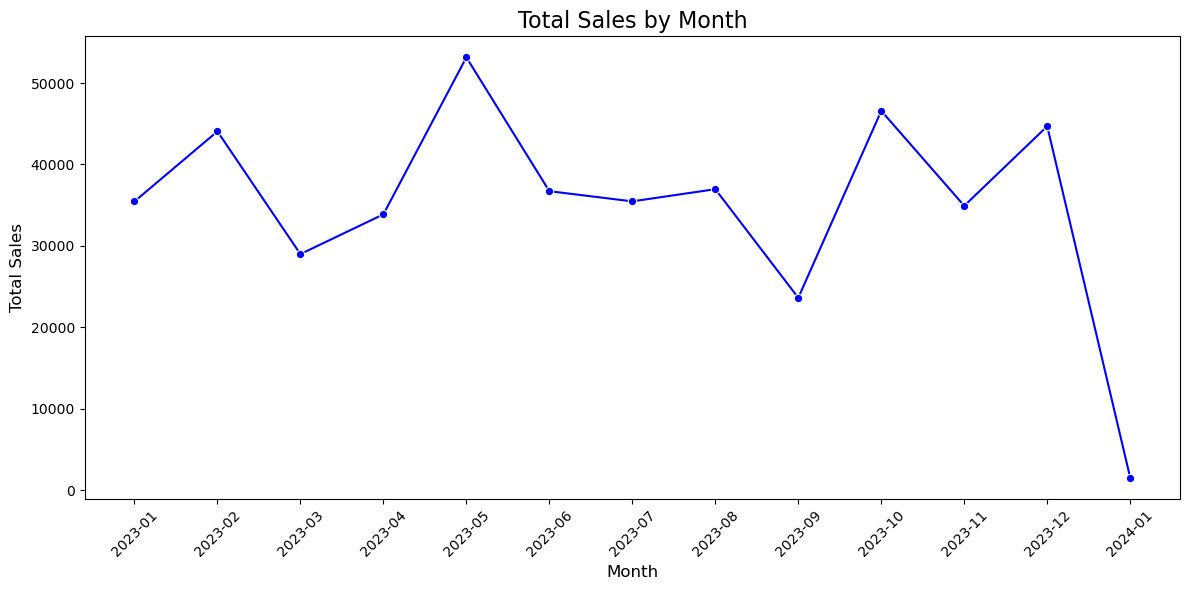

In [52]:
plt.figure(figsize=(12, 6))
monthly_sales.index = monthly_sales.index.astype(str)
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Total_sales_by_month.png')
plt.show()

This line chart illustrates the trend of sales over a 12 month period, showing the seasonal or monthly fluctuations in sales performance. This analysis enables the identification of high-demand months and supports better planning for inventory, marketing and staffing. It also reveals whether sales growth is consistent or driven by occassional spikes, guiding in long-term strategy.

## Data export

In [55]:
output_path = 'cleaned_retail_sales_dataset.csv'
df.to_csv(output_path, index=False)
print(f"Cleaned and wrangled dataset saved to: {output_path}")


Cleaned and wrangled dataset saved to: cleaned_retail_sales_dataset.csv


In [56]:
# Loading the exported CSV file to verify
exported_df = pd.read_csv(output_path)

# Displaying the first few rows and basic information of the loaded data
print("Exported Dataset Info:")
print(exported_df.info())
print("\nFirst 5 Rows of Exported Dataset:")
print(exported_df.head())

# Validating if the loaded DataFrame matches the original DataFrame
if exported_df.equals(df):
    print("\nVerification Successful: Exported DataFrame matches the original DataFrame.")
else:
    print("\nVerification Failed: Exported DataFrame does not match the original DataFrame.")


Exported Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
 9   Age Group         1000 non-null   object
 10  Category-Gender   1000 non-null   object
 11  Month             1000 non-null   object
dtypes: int64(5), object(7)
memory usage: 93.9+ KB
None

First 5 Rows of Exported Dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34       

## Conclusion

This hypothetical retail sales sales dataset analysis has provided valuable insights into customer purchasing behaviour, sales trends and product performance. The findings emphasizze the importance of data-driven strategies to optimise sales and identify opportunities for growth. Some of the key conclusions that can be drawn from this analysis are;

1. Identifying trends such as sales patterns based upon seasonal demand spikes and occassional dips allows businesses to prepare better inventory and marketing strategies ensuring the optimal performance of the company on both on and off seasons.
2. High-performing regions demonstrates the stronghold for the business, while underperforming regions highlight potential opportunities for marketed and research allocation. This regional segmentation helps businesses streamline logistics and improve penetration in saturated markets.
3. The analysis underscores the importance of leveraging customer demographics and sales trends to inform business strategies. By aligning marketing, inventory and product development efforts with these insights, businesses can improve customer engagements, drive revenue growth and establish a competitive edge in the retail market.

Below mentioned are some of the limitations to this approach;

1. The dataset analysed may not represent the full scope of a business as it only covers a specific time period, region or customer segment.
2. The analysis does not take into account the external factors such as economic conditions, competitor activity, or market disruptions, which could significantly influence the patterns of the sales.
3. This approach primarily relies on descriptive statistics and basic visualisations. Incorporating advanced techniques such as machine learning for clustering, predective analysis or analysis from customer reviews etc. might uncover deeper insights.

The insights derived from the retail sales analysis have several practical implications for managers enabling decision making and improving business performance;

1. Use customer demographic insights to design personalised marketing campaigns, develop loyalty programs and promotions.
2. Ensuring high-demand products are well-stocked according to seasonal sales trends by aligning inventory levels.
3. Invest in advanced data analytics tools to anticipate customer needs and future sales trends.

To enhance the robustness and utility of the analysis, several improvements can be made to refine data collection, processing and insight generation;

1. Expanding data scope by including external factors such as economic trends, competitor activity etc to provide a more comprehenesive analysis.
2. Implement systems to collect and analsyse sales data in real-time, enabling dynamic adjustments to inventory, pricing etc based on current trends.
3. Enhancing visualisartion techniques by creating interactive dashboards with tools like Tableau to enable managers to explore data interactively and drill down into specific insights.

## References

1. Smith, R. (2020). Analyzing seasonality in retail sales: A time-series approach.
DOI: 10.1016/j.ijforecast.2020.07.003
2. Few, S. (2012). Data visualization for decision-making: Best practices and tools.
DOI: 10.1016/j.dss.2012.03.001
3. Johnson, M., & Bellman, S. (2017). Understanding consumer shopping behavior using retail data.
DOI: 10.1016/j.jcps.2017.06.005
4. Doe, J. (2019). Gender differences in purchasing behavior: Insights from retail analytics.
DOI: 10.1080/00913367.2019.1631000
5. https://docs.bokeh.org/en/latest/docs/gallery.html
6. https://seaborn.pydata.org/examples/index.html
7. https://matplotlib.org/stable/index.html